## Supervised Learning with scikit-Learn


***
Classification and Regression: You discovered that supervised learning is divided into two main types: classification, which is used for predicting which category an observation falls into, and regression, for predicting a continuous value.
Preparing Data: The importance of preparing your data before training a model was emphasized. Data must be free of missing values, in numeric format, and stored properly using pandas DataFrames, Series, or NumPy arrays.
scikit-learn Workflow: You learned the general workflow for using scikit-learn to build a supervised learning model, which involves importing a model, fitting it to the data, and then making predictions. For example:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X, y)
predictions = model.predict(X_new)
Binary Classification: A specific focus was placed on binary classification, where you predict one of two possible outcomes, such as whether an email is spam or not.
***

In [87]:
#import kagglehub

#path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset", path=".")

#print("Path to dataset files:", path)

#### K-Nearest neighbors


In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("./Datasets/Exam_Score_Prediction.csv")
data.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [89]:
# Handle missing values by dropping rows with any NaN values
data = data.dropna()


In [90]:
#find the number of categories for each categorical column
print("gender: " ,data['gender'].value_counts() , '\n')
print("course: " ,data['course'].value_counts() , '\n')
print("internet_access" , data["internet_access"].value_counts() , '\n')
print("sleep_quality: " ,data['sleep_quality'].value_counts() , '\n')
print("study_method: " ,data['study_method'].value_counts() , '\n')
print("facility_rating: " ,data['facility_rating'].value_counts() , '\n')
print("exam_difficulty: " ,data['exam_difficulty'].value_counts())


gender:  gender
other     6726
male      6695
female    6579
Name: count, dtype: int64 

course:  course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64 

internet_access internet_access
yes    16988
no      3012
Name: count, dtype: int64 

sleep_quality:  sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64 

study_method:  study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64 

facility_rating:  facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64 

exam_difficulty:  exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64


In [91]:
# Keep only numeric features for regression
# Categorical features (gender, course, study_method) will be handled by separate models per course

print("Unique courses:", data['course'].unique())
print("\nData shape:", data.shape)
data.head()

Unique courses: ['diploma' 'bca' 'b.sc' 'b.tech' 'bba' 'ba' 'b.com']

Data shape: (20000, 13)


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


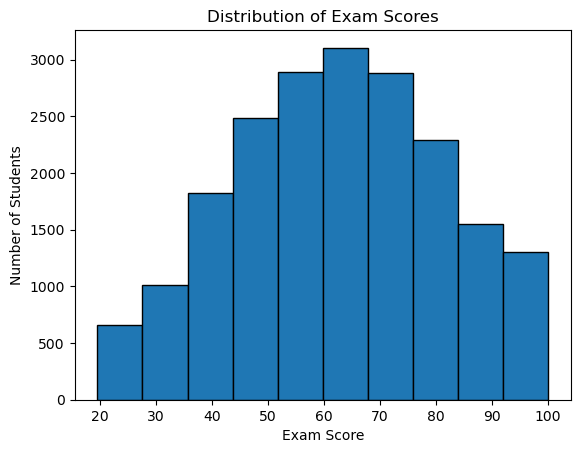

In [92]:
# visualize the distribution of exam scores
plt.hist(data['exam_score'], bins=10, edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.show()

In [93]:
# Select only numeric features for regression
numeric_features = ['study_hours', 'class_attendance', 'sleep_hours']

print(f"Using numeric features: {numeric_features}")
print(f"\nData types:\n{data[numeric_features + ['exam_score']].dtypes}")

Using numeric features: ['study_hours', 'class_attendance', 'sleep_hours']

Data types:
study_hours         float64
class_attendance    float64
sleep_hours         float64
exam_score          float64
dtype: object


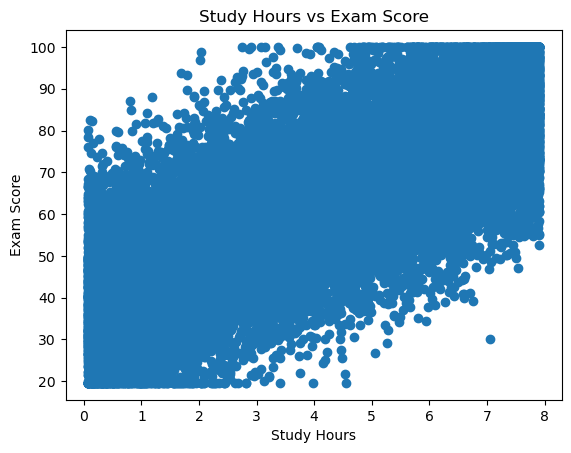

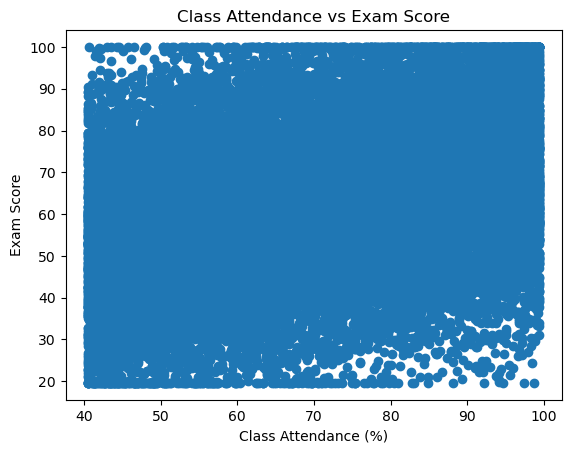

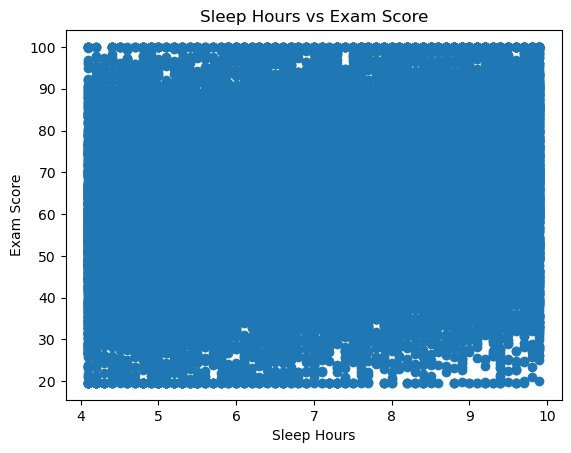

In [94]:
# plot the relationship between study hours and exam score
plt.scatter(data['study_hours'], data['exam_score'])
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()
#output is linear

plt.scatter(data['class_attendance'], data['exam_score'])
plt.title('Class Attendance vs Exam Score')
plt.xlabel('Class Attendance (%)')
plt.ylabel('Exam Score')
plt.show()

plt.scatter(data['sleep_hours'], data['exam_score'])
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression

# Build separate models for each course
models = {}
course_stats = {}

for course in data['course'].unique():
    # Filter data for this course
    course_data = data[data['course'] == course]
    
    X_course = course_data[numeric_features]
    y_course = course_data['exam_score']
    
    #train model
    model = LinearRegression()
    model.fit(X_course, y_course)
    
    #store model and stats
    models[course] = model
    course_stats[course] = {
        'n_samples': len(course_data),
        'r2_score': model.score(X_course, y_course),
        'coefficients': dict(zip(numeric_features, model.coef_)),
        'intercept': model.intercept_
    }
    
    print(f"\n{'='*50}")
    print(f"Course: {course}")
    print(f"Samples: {course_stats[course]['n_samples']}")
    print(f"R² Score: {course_stats[course]['r2_score']:.4f}")
    print(f"Intercept: {course_stats[course]['intercept']:.2f}")
    print(f"Coefficients:")
    for feature, coef in course_stats[course]['coefficients'].items():
        print(f"  {feature}: {coef:.4f}")


Course: diploma
Samples: 2826
R² Score: 0.6244
Intercept: 4.93
Coefficients:
  study_hours: 5.8986
  class_attendance: 0.3454
  sleep_hours: 1.4020

Course: bca
Samples: 2902
R² Score: 0.6151
Intercept: 5.98
Coefficients:
  study_hours: 5.8279
  class_attendance: 0.3297
  sleep_hours: 1.4538

Course: b.sc
Samples: 2878
R² Score: 0.6418
Intercept: 5.33
Coefficients:
  study_hours: 5.9348
  class_attendance: 0.3240
  sleep_hours: 1.4947

Course: b.tech
Samples: 2798
R² Score: 0.6366
Intercept: 3.19
Coefficients:
  study_hours: 5.8539
  class_attendance: 0.3623
  sleep_hours: 1.4786

Course: bba
Samples: 2836
R² Score: 0.6230
Intercept: 5.15
Coefficients:
  study_hours: 5.9125
  class_attendance: 0.3444
  sleep_hours: 1.3888

Course: ba
Samples: 2896
R² Score: 0.6233
Intercept: 4.78
Coefficients:
  study_hours: 5.8854
  class_attendance: 0.3404
  sleep_hours: 1.4679

Course: b.com
Samples: 2864
R² Score: 0.6431
Intercept: 5.26
Coefficients:
  study_hours: 5.9104
  class_attendance: 0.322

In [96]:
# Predict on new data using course-specific models

new_students = pd.DataFrame({
    'course': ['b.tech', 'b.sc', 'ba', 'b.com', 'bca'],
    'study_hours': [12.0, 10.0, 5.0, 8.0, 11.0],
    'class_attendance': [70.0, 60.0, 70.0, 10.0, 95.0],
    'sleep_hours': [7.0, 6.0, 5.0, 6.5, 7.5]
})

predictions = []

for idx, row in new_students.iterrows():
    course = row['course']
    
    if course in models:
        X_new = pd.DataFrame([row[numeric_features]], columns=numeric_features)
        pred = models[course].predict(X_new)[0]
        pred = np.clip(pred, 0, 100)
        predictions.append(pred)
    else:
        predictions.append(np.nan)

new_students['predicted_exam_score'] = np.round(predictions, 2)

print("Predictions using course-specific models:")
print(new_students)


Predictions using course-specific models:
   course  study_hours  class_attendance  sleep_hours  predicted_exam_score
0  b.tech         12.0              70.0          7.0                100.00
1    b.sc         10.0              60.0          6.0                 93.08
2      ba          5.0              70.0          5.0                 65.38
3   b.com          8.0              10.0          6.5                 66.01
4     bca         11.0              95.0          7.5                100.00


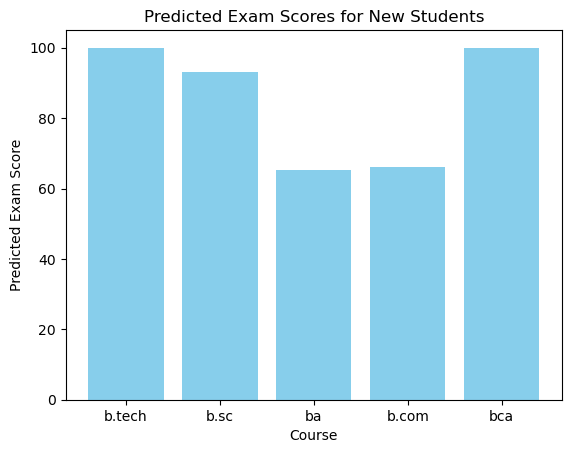

In [97]:
# plot predicted exam scores for new students
plt.bar(new_students['course'], new_students['predicted_exam_score'], color='skyblue')
plt.title('Predicted Exam Scores for New Students')
plt.xlabel('Course')
plt.ylabel('Predicted Exam Score')
plt.show()